In [1]:
%load_ext tensorboard

In [2]:
project_path = "/Users/befeltingu/Documents/Github/VikingZeroDev"

In [3]:
import numpy as np
import torch

from vikingzero.run_agent import run_agent

In [4]:
config_file = project_path + "/notebooks/tictactoe_alphago.yaml"
#config_file = project_path + "/notebooks/test_tictactoe.yaml"

Processing Yaml Config File
----------------PASSED PARAMS -----------------------
{
    "agent_config": {
        "agent1": {
            "agent": "AlphaZero",
            "augment_input": true,
            "batch_size": 16,
            "c": 1.41,
            "dirichlet_noise": 1,
            "dropout": 0.3,
            "epochs": 25,
            "epsilon": 0,
            "input_height": 3,
            "input_width": 3,
            "lr": 0.001,
            "max_mem_size": 10000,
            "minimax_lookup_path": "/Users/befeltingu/Documents/Github/VikingZeroDev/tests/minimax_state_actions.npy",
            "momentum": 0.9,
            "n_sim": 15,
            "network_path": "",
            "network_type": "cnn_small",
            "num_channels": 32,
            "optimizer": "Adam",
            "output_size": 9,
            "player": 1,
            "state_lookup_path": "/Users/befeltingu/Documents/Github/VikingZeroDev/tests/state_dict.npy",
            "t_threshold": 2,
            "we

  0%|          | 0/15 [00:00<?, ?it/s]

Done loading configurations now running experiment
Running iteration 0
Training time =0.01754141648610433 For 10 iters
Training network time =0.0030187010765075684


  7%|▋         | 1/15 [00:01<00:18,  1.33s/it]

Running iteration 1
Training time =0.01629586617151896 For 10 iters
Training network time =0.002961579958597819


 13%|█▎        | 2/15 [00:02<00:17,  1.31s/it]

Running iteration 2
Training time =0.014929131666819254 For 10 iters
Training network time =0.0027110497156778973


 20%|██        | 3/15 [00:03<00:15,  1.27s/it]

Running iteration 3
Training time =0.012158068021138509 For 10 iters
Training network time =0.002657636006673177


 27%|██▋       | 4/15 [00:04<00:12,  1.18s/it]

Running iteration 4
Training time =0.010042266050974528 For 10 iters
Training network time =0.0027902841567993162


 33%|███▎      | 5/15 [00:05<00:10,  1.08s/it]

Running iteration 5
Training time =0.008165132999420167 For 10 iters
Training network time =0.0026616652806599936


 40%|████      | 6/15 [00:06<00:08,  1.02it/s]

Running iteration 6
Training time =0.007873086134592693 For 10 iters
Training network time =0.002637481689453125


 47%|████▋     | 7/15 [00:07<00:07,  1.11it/s]

Running iteration 7
Training time =0.00822821855545044 For 10 iters
Training network time =0.0026136318842569987


 53%|█████▎    | 8/15 [00:07<00:05,  1.18it/s]

Running iteration 8
Training time =0.0065636793772379555 For 10 iters
Training network time =0.0026351133982340496


 60%|██████    | 9/15 [00:08<00:04,  1.28it/s]

Running iteration 9
Training time =0.005470001697540283 For 10 iters
Training network time =0.002585764726003011


 67%|██████▋   | 10/15 [00:08<00:03,  1.39it/s]

Running iteration 10
Training time =0.005718445777893067 For 10 iters
Training network time =0.0026081005732218423


 73%|███████▎  | 11/15 [00:09<00:02,  1.47it/s]

Running iteration 11
Training time =0.006514251232147217 For 10 iters
Training network time =0.002716501553853353


 80%|████████  | 12/15 [00:10<00:02,  1.49it/s]

Running iteration 12
Training time =0.0067204674084981285 For 10 iters
Training network time =0.002688900629679362


 87%|████████▋ | 13/15 [00:10<00:01,  1.50it/s]

Running iteration 13
Training time =0.006269665559132894 For 10 iters
Training network time =0.0026274482409159344


 93%|█████████▎| 14/15 [00:11<00:00,  1.53it/s]

Running iteration 14
Training time =0.006515113512674967 For 10 iters
Training network time =0.002708299954732259


100%|██████████| 15/15 [00:12<00:00,  1.24it/s]


Done running experiment
Showing results


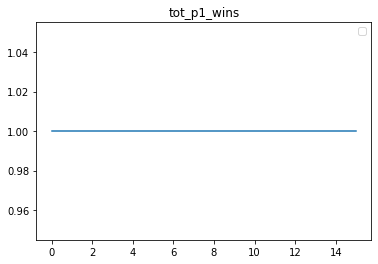

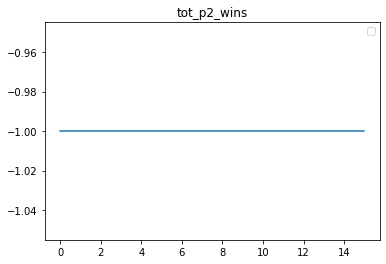

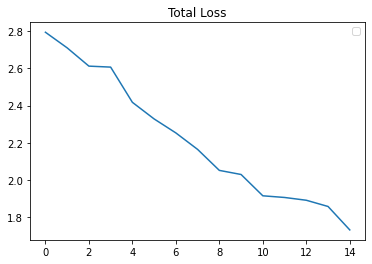

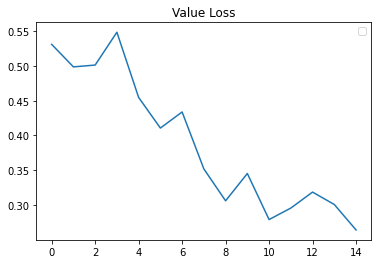

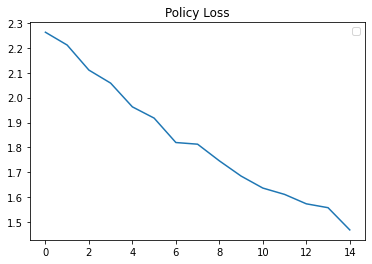

In [5]:
logger,agent = run_agent(config_file)

In [6]:
memory = agent._memory

In [7]:
memory_list = memory.memory

In [8]:
memory_list[0]

Memory(state=array([[[0., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]]), action_dist=None, action_mcts=array([0.        , 0.21428571, 0.21428571, 0.        , 0.21428571,
       0.        , 0.        , 0.21428571, 0.14285714]), value=None, z=1)

In [9]:
s =memory_list[0].state

In [10]:
agent.reverse_transform(s)

array([2., 0., 0., 2., 0., 1., 1., 0., 0.])

In [11]:
state = agent.transform_state(np.array([2,0,0,2,0,1,1,0,0]))
state2 = agent.transform_state(np.array([2,0,0,2,0,1,1,0,1]))

In [12]:
state

array([[[0., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [13]:
new_memory = []

In [14]:
for data in memory_list:
    if np.equal(data.state,state).all() or np.equal(data.state,state2).all():
        #data.z = 1.0
        #data.action_mcts = np.array([0,0,0,0,0,0,0,0,1])
        #print(data.action_mcts.reshape((3,3)))
        #print(data.z)
        #print()
        new_memory.append(data)


In [20]:
for data in new_memory:
    if np.equal(data.state,state).all():
        data.z = 1

In [21]:
memory.memory = new_memory

In [22]:
len(agent._memory.memory)

154

In [23]:
for _ in range(50):
    agent.train_network()

In [103]:
state

array([[[0., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [26]:
p , v = agent._nn.predict(torch.FloatTensor(state2))

In [27]:
v

-0.99999994

In [124]:
p

array([2.9543762e-07, 7.8291399e-04, 7.7078224e-04, 1.4186828e-07,
       5.7811232e-04, 1.4912513e-07, 3.7403629e-07, 7.1590405e-04,
       9.9715155e-01], dtype=float32)

In [112]:
p

array([0.00188016, 0.3081507 , 0.14538172, 0.0020698 , 0.24223417,
       0.00181767, 0.00213381, 0.15038867, 0.14594324], dtype=float32)

In [ ]:
state = state.reshape((3,3))

In [6]:
%tensorboard --logdir=runs/ --host localhost

Reusing TensorBoard on port 6006 (pid 24235), started 1 day, 2:15:36 ago. (Use '!kill 24235' to kill it.)